In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
upload = files.upload()

Saving ShippingData.csv to ShippingData.csv


In [ ]:
df = pd.read_csv('ShippingData.csv')
print(df.shape)

(10999, 12)


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
df.info() # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# Dropping ID column
df = df.drop('ID', axis = 1)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df = df.rename({'Reached.on.Time_Y.N': 'Reached_on_Time'}, axis = 1)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


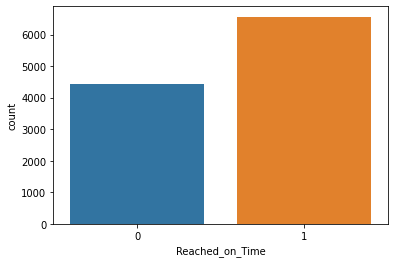

In [ ]:
sns.countplot(df['Reached_on_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


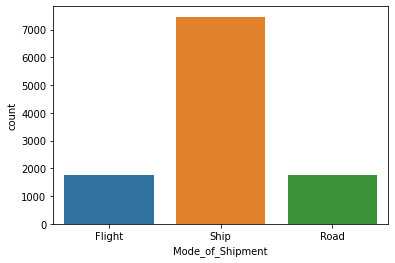

In [ ]:
sns.countplot(df['Mode_of_Shipment'])

Text(0.5, 1.0, 'Mode of Shipment Vs Product Reached on time')

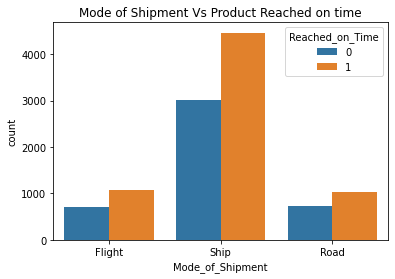

In [ ]:
sns.countplot(x = 'Mode_of_Shipment', data = df, hue = 'Reached_on_Time')
plt.title('Mode of Shipment Vs Product Reached on time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


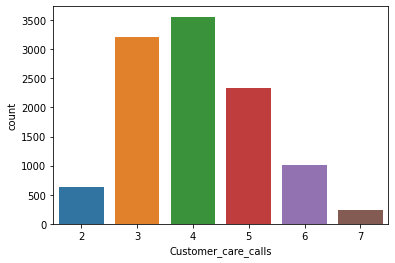

In [ ]:
sns.countplot(df['Customer_care_calls'])

Text(0.5, 1.0, 'Customer care calls Vs Product Reached on time')

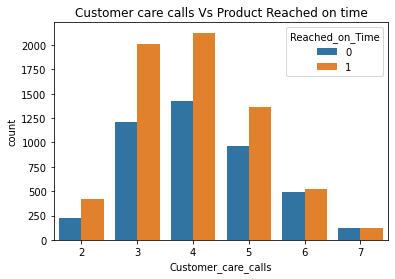

In [ ]:
sns.countplot(x = 'Customer_care_calls', data = df, hue = 'Reached_on_Time')
plt.title('Customer care calls Vs Product Reached on time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


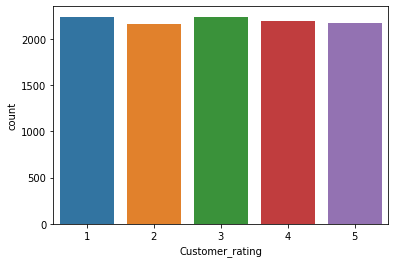

In [ ]:
sns.countplot(df['Customer_rating'])

Text(0.5, 1.0, 'Customer rating Vs Product Reached on time')

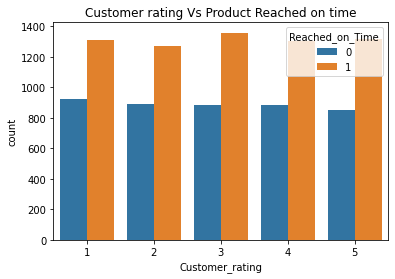

In [ ]:
sns.countplot(x = 'Customer_rating', data = df, hue = 'Reached_on_Time')
plt.title('Customer rating Vs Product Reached on time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


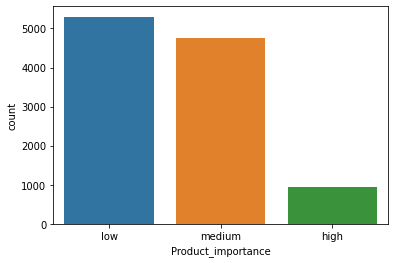

In [ ]:
sns.countplot(df['Product_importance'])

Text(0.5, 1.0, 'Product importance Vs Product Reached on time')

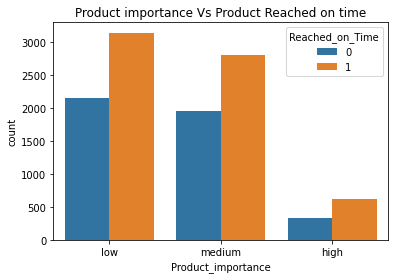

In [ ]:
sns.countplot(x = 'Product_importance', data = df, hue = 'Reached_on_Time')
plt.title('Product importance Vs Product Reached on time')

(array([ 222.,  532., 1417., 1331., 1310., 1361., 1630., 1927.,  953.,
         316.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

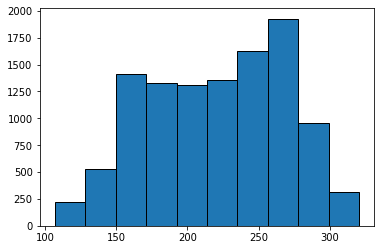

In [ ]:
plt.hist(df.Cost_of_the_Product, bins=10, edgecolor='black', align='right')

(array([2.226e+03, 1.352e+03, 6.030e+02, 6.240e+02, 1.537e+03, 2.069e+03,
        2.003e+03, 5.790e+02, 1.000e+00, 5.000e+00]),
 array([1001. , 1685.5, 2370. , 3054.5, 3739. , 4423.5, 5108. , 5792.5,
        6477. , 7161.5, 7846. ]),
 <a list of 10 Patch objects>)

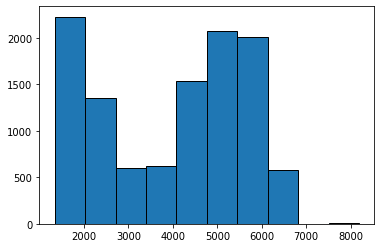

In [ ]:
plt.hist(df.Weight_in_gms, bins=10, edgecolor='black', align='right')

(array([5846., 2668.,  334.,  266.,  259.,  346.,  281.,  373.,  289.,
         337.]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 10 Patch objects>)

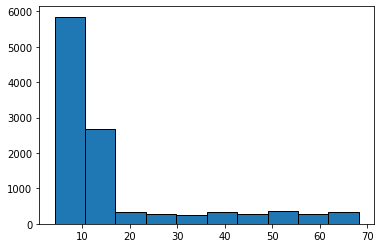

In [ ]:
plt.hist(df.Discount_offered, bins=10, edgecolor='black', align='right')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


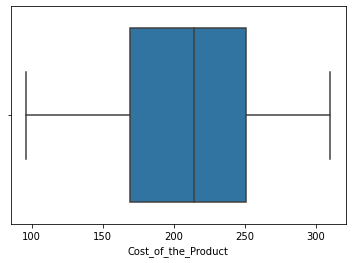

In [ ]:
sns.boxplot(df['Cost_of_the_Product'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


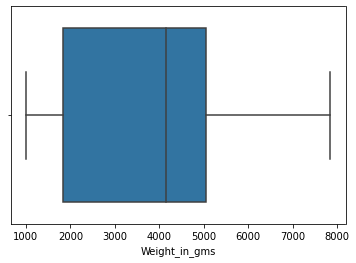

In [ ]:
sns.boxplot(df['Weight_in_gms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


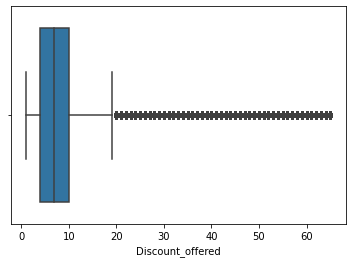

In [ ]:
sns.boxplot(df['Discount_offered'])

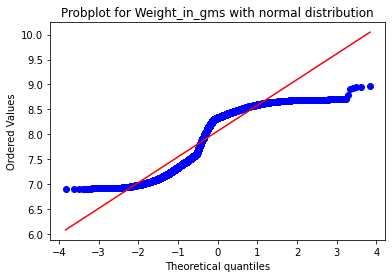

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
sa = stats.probplot(np.log(df.Weight_in_gms),plot=ax)
ax.set_title("Probplot for Weight_in_gms with normal distribution")
plt.show()

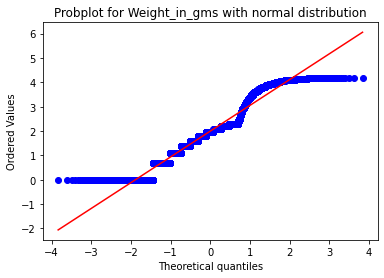

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
sa = stats.probplot(np.log(df.Discount_offered),plot=ax)
ax.set_title("Probplot for Weight_in_gms with normal distribution")
plt.show()

**Preprocessing**

Let us first look at the number of unique values in the categorical features so as to check if it is meaningful to one hot encode them

In [ ]:
for column in df.select_dtypes('object').columns:
  print(column, len(df[column].unique()))

Warehouse_block 5
Mode_of_Shipment 3
Product_importance 3
Gender 2


All the features have smaller number of unique values, so it worthwhile to use label encoding. For 'Gender' feature, since it is a binary feature, we can use only 1 column instead of 2 (binary encoding) for it so as to make the modelling less complex

In [ ]:
# Label encoding

df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})

def label_encoding(dataframe, column):
  dataframe = dataframe.copy()
  dummies = pd.get_dummies(dataframe[column], prefix = column)
  dataframe = pd.concat([dataframe, dummies], axis = 1)
  dataframe = dataframe.drop(column, axis = 1)
  return dataframe

for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']:
  df = label_encoding(df, column = column)

df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
X = df.drop('Reached_on_Time', axis = 1)
y = df['Reached_on_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Feature Selection**

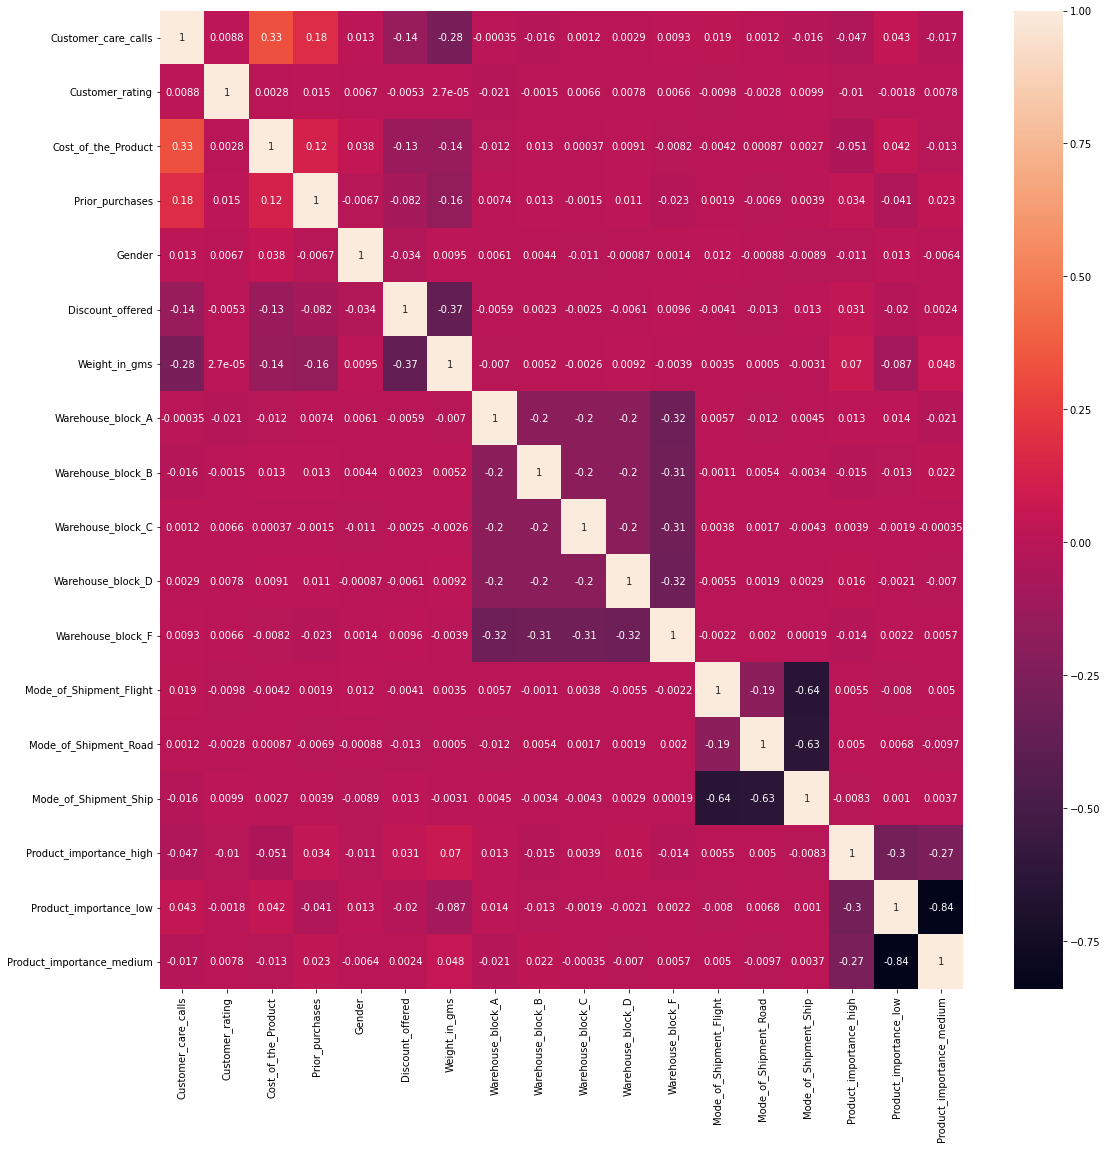

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [ ]:
# With this function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(pd.DataFrame(X_train), 0.85)
print(len(set(corr_features)))
print(corr_features)

0
set()


From above we can see that no two features are highly correlated

In [ ]:
X_train = pd.DataFrame(X_train).drop(corr_features,axis=1);
X_test = pd.DataFrame(X_test).drop(corr_features,axis=1);

print(X_train.shape)
print(X_test.shape)

(7699, 18)
(3300, 18)


In [ ]:
# Scaling the data
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

In [ ]:
# Function to print various performance metrics
def performance_metrics(X_train, X_test, y_train, y_test, y_pred, model):
  conf_matrix = confusion_matrix(y_test, y_pred)

  plt.figure(figsize = (4,4))
  sns.heatmap(conf_matrix, annot = True, fmt='g', vmin=0, cmap = 'Blues', cbar = False)
  plt.xlabel('Predictions')
  plt.ylabel('Actuals')
  plt.title('Confusion Matrix')
  plt.show()

  print('Train Accuracy: %.3f' % model.score(X_train, y_train))
  print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))

**Modelling**

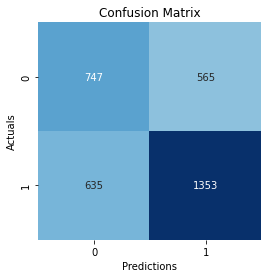

Train Accuracy: 0.641
Test Accuracy: 0.636
Precision: 0.705
Recall: 0.681
F1 Score: 0.693


In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, lr)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

LogisticRegression(C=0.0001, max_iter=1000, penalty='l1', solver='saga')


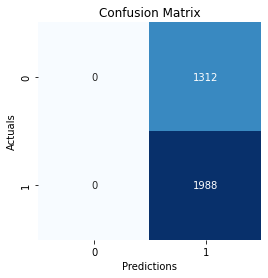

Train Accuracy: 0.745
Test Accuracy: 0.602
Precision: 0.602
Recall: 1.000
F1 Score: 0.752


In [ ]:
# Logistic Regression Hyper-parameter Tuning
lr = LogisticRegression()

param_grid = [{'penalty': ['l1', 'l2', 'elasticnet'],
               'C': np.logspace(-4,4,20),
               'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter': [1000]}]

clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = True, n_jobs = -1)

best_clf = clf.fit(X_train, y_train)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, best_clf)

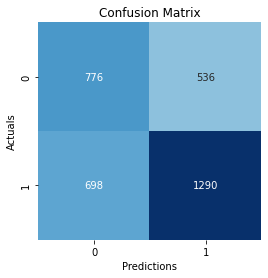

Train Accuracy: 0.764
Test Accuracy: 0.626
Precision: 0.706
Recall: 0.649
F1 Score: 0.676


In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, knn)

Fitting 3 folds for each of 114 candidates, totalling 342 fits
KNeighborsClassifier(n_neighbors=1)


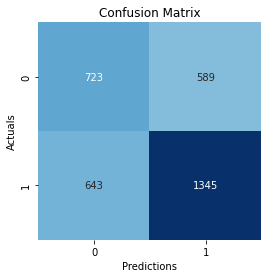

Train Accuracy: 1.000
Test Accuracy: 0.627
Precision: 0.695
Recall: 0.677
F1 Score: 0.686


In [ ]:
# K Nearest Neighbors Hyper-parameter Tuning
knn = KNeighborsClassifier() 

param_grid = [{'n_neighbors': list(range(1,20)),
               'weights': ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}]

clf = GridSearchCV(knn, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = 2, n_jobs = -1)

best_clf = clf.fit(X_train, y_train)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, best_clf)

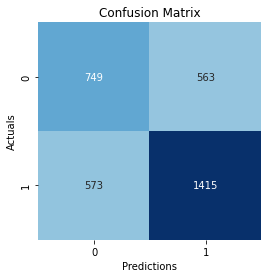

Train Accuracy: 1.000
Test Accuracy: 0.656
Precision: 0.715
Recall: 0.712
F1 Score: 0.714


In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, dtree)

Fitting 3 folds for each of 722 candidates, totalling 2166 fits
DecisionTreeClassifier(max_depth=16, min_samples_leaf=3, random_state=42)


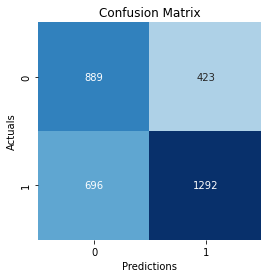

Train Accuracy: 0.840
Test Accuracy: 0.661
Precision: 0.753
Recall: 0.650
F1 Score: 0.698


In [ ]:
# Decision Tree Hyper-parameter Tuning
dtree = DecisionTreeClassifier(random_state = 42)

param_grid = [{'max_depth': list(range(1,20)),
               'min_samples_leaf': list(range(1,20)),
               'criterion': ["gini", "entropy"]}]

clf = GridSearchCV(dtree, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = True, n_jobs = -1)

best_clf = clf.fit(X_train, y_train)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, best_clf)

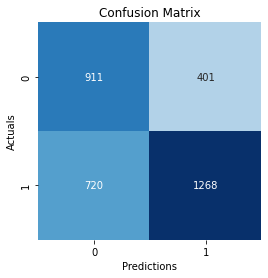

Train Accuracy: 1.000
Test Accuracy: 0.660
Precision: 0.760
Recall: 0.638
F1 Score: 0.693


In [ ]:
# Random Forest
rfm = RandomForestClassifier(random_state = 42)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, rfm)

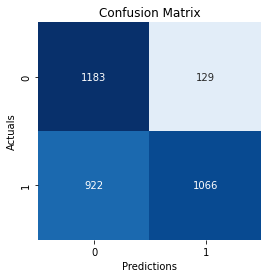

Train Accuracy: 0.710
Test Accuracy: 0.682
Precision: 0.892
Recall: 0.536
F1 Score: 0.670


In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, xgb)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
XGBClassifier(learning_rate=0.01, max_depth=2, n_estimators=60, random_state=42)


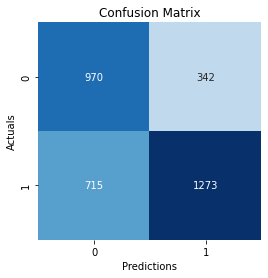

Train Accuracy: 0.697
Test Accuracy: 0.680
Precision: 0.788
Recall: 0.640
F1 Score: 0.707


In [ ]:
# XGBoost Hyper-parameter Tuning
xgb = XGBClassifier(random_state = 42)

param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

clf = GridSearchCV(xgb, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = True, n_jobs = -1)

best_clf = clf.fit(X_train, y_train)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, best_clf)

The XGBoost after hyper parameter tuning has an improved performance when compared to the initial XGBoost model. There is a good fit as well (No over-fitting) and has the highest F1 score (0.707) of all the models we built. XGBoost is expected to perform the best because we know that in general the ensemble methods have higher predictive power and performance.